In [1]:
from os.path import join
import time
import datetime

from random import sample, seed

import h5py

from pandas import read_csv, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import f1_score

In [2]:
data_dir = "/home/benoit/data/dreem_challenge/"
data_path = "/home/benoit/data/dreem_challenge/X_train/X_train.h5"
labels_path = "/home/benoit/data/dreem_challenge/y_train.csv"

d = h5py.File(data_path, 'r')
labels = read_csv(labels_path)

print(d.keys())

<KeysViewHDF5 ['eeg_1', 'eeg_2', 'eeg_3', 'eeg_4', 'eeg_5', 'eeg_6', 'eeg_7', 'index', 'index_absolute', 'index_window', 'pulse', 'x', 'y', 'z']>


In [3]:
meta_data = DataFrame()

meta_data['index'] = d['index_absolute'][()]
meta_data['subject_id'] = d['index'][()]
meta_data['window'] = d['index_window'][()]
meta_data['label'] = labels['sleep_stage']

_N_ = len(meta_data)
_F_ = 50

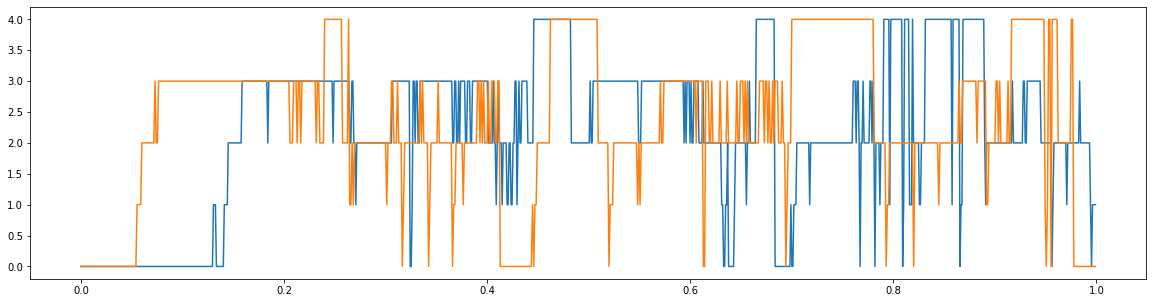

In [4]:
plt.rcParams['figure.figsize'] = [20, 5]

subject = meta_data[meta_data['subject_id'] == 0]
# Là j'ai normalisé les intervals temporels comme ils n'ont pas la même longueur 
plt.plot(subject['window'].values/len(subject['window'].values), subject['label'].values)
subject = meta_data[meta_data['subject_id'] == 1]
plt.plot(subject['window'].values/len(subject['window'].values), subject['label'].values)

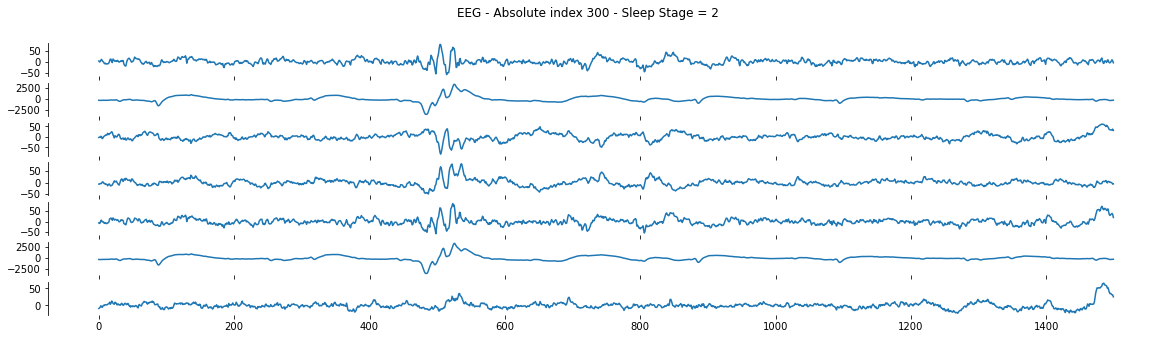

In [5]:
from tools.plot import plot_eeg

for i in [300]:    
    plot_eeg(i, d, meta_data)

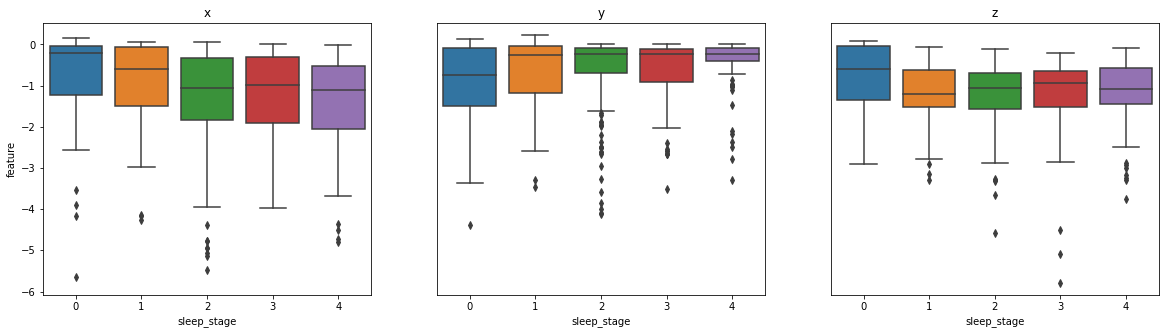

In [6]:
# Etudes des features
from tools.plot import compare_feature
from tools.features import *


spl = sample([i for i in range(_N_)], 500)

compare_feature(log_ampl, d, meta_data, sample=spl, col=['x', 'y', 'z'])

In [7]:
# features = extract_features([log_ampl, mean, log_energy, kurtosis], d, sample=spl)  
# y = meta_data["label"][spl]

In [8]:
from tools.processing import load_features, merge_features

features_1 = load_features(join(data_dir, "computed", 'base_1_train.csv'))
features_2 = load_features(join(data_dir, "computed", 'base_2_train.csv'))

features = merge_features([features_1, features_2])
y = meta_data['label']

features = features.drop(['abs_index'], axis=1)
features.keys()



Index(['eeg_0_log_ampl', 'eeg_0_mean', 'eeg_0_log_energy', 'eeg_0_kurtosis',
       'eeg_1_log_ampl', 'eeg_1_mean', 'eeg_1_log_energy', 'eeg_1_kurtosis',
       'eeg_2_log_ampl', 'eeg_2_mean', 'eeg_2_log_energy', 'eeg_2_kurtosis',
       'eeg_3_log_ampl', 'eeg_3_mean', 'eeg_3_log_energy', 'eeg_3_kurtosis',
       'eeg_4_log_ampl', 'eeg_4_mean', 'eeg_4_log_energy', 'eeg_4_kurtosis',
       'eeg_5_log_ampl', 'eeg_5_mean', 'eeg_5_log_energy', 'eeg_5_kurtosis',
       'eeg_6_log_ampl', 'eeg_6_mean', 'eeg_6_log_energy', 'eeg_6_kurtosis',
       'eeg_0_skewness', 'eeg_0_log_variance', 'eeg_0_zero_crossings',
       'eeg_1_skewness', 'eeg_1_log_variance', 'eeg_1_zero_crossings',
       'eeg_2_skewness', 'eeg_2_log_variance', 'eeg_2_zero_crossings',
       'eeg_3_skewness', 'eeg_3_log_variance', 'eeg_3_zero_crossings',
       'eeg_4_skewness', 'eeg_4_log_variance', 'eeg_4_zero_crossings',
       'eeg_5_skewness', 'eeg_5_log_variance', 'eeg_5_zero_crossings',
       'eeg_6_skewness', 'eeg_6_log

In [14]:
features.shape

(24688, 49)

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3)

# slct = SelectKBest(f_classif, k=10)

# X_train = slct.fit_transform(X_train, y_train)
# X_test = slct.transform(X_test)

# X_train

In [10]:
#clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)
#clf = KNeighborsClassifier(n_neighbors = 15)
#clf= SVC(kernel = 'linear', C = 1)
#clf = GaussianNB()

In [11]:
# RFC HyperParameter tuning

#from sklearn.model_selection import validation_curve

#validation_curve(clf, X_train, y_train, param_name='n_estimator', param_range =[10, 30, 50, 100, 200])


In [12]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)

clf.fit(X_train, y_train)

predictions = clf.predict(X_train)
print(f"Training score - {f1_score(predictions, y_train, average='weighted')}")

predictions = clf.predict(X_test)
print(f"Testing score - {f1_score(predictions, y_test, average='weighted')}")

Training score - 1.0
Testing score - 0.7214772465782802


In [23]:
from tools.processing import merge_features

eval_path = "/home/benoit/data/dreem_challenge/X_test/X_test.h5"

d_eval = h5py.File(eval_path, 'r')

f_1_e = load_features(join(data_dir, "computed", 'base_1_eval.csv'))
f_2_e = load_features(join(data_dir, "computed", 'base_2_eval.csv'))

f_eval = merge_features([f_1_e, f_2_e])

f_eval = f_eval.drop(['abs_index'], axis=1)

Index(['eeg_0_log_ampl', 'eeg_0_mean', 'eeg_0_log_energy', 'eeg_0_kurtosis',
       'eeg_1_log_ampl', 'eeg_1_mean', 'eeg_1_log_energy', 'eeg_1_kurtosis',
       'eeg_2_log_ampl', 'eeg_2_mean', 'eeg_2_log_energy', 'eeg_2_kurtosis',
       'eeg_3_log_ampl', 'eeg_3_mean', 'eeg_3_log_energy', 'eeg_3_kurtosis',
       'eeg_4_log_ampl', 'eeg_4_mean', 'eeg_4_log_energy', 'eeg_4_kurtosis',
       'eeg_5_log_ampl', 'eeg_5_mean', 'eeg_5_log_energy', 'eeg_5_kurtosis',
       'eeg_6_log_ampl', 'eeg_6_mean', 'eeg_6_log_energy', 'eeg_6_kurtosis',
       'eeg_0_skewness', 'eeg_0_log_variance', 'eeg_0_zero_crossings',
       'eeg_1_skewness', 'eeg_1_log_variance', 'eeg_1_zero_crossings',
       'eeg_2_skewness', 'eeg_2_log_variance', 'eeg_2_zero_crossings',
       'eeg_3_skewness', 'eeg_3_log_variance', 'eeg_3_zero_crossings',
       'eeg_4_skewness', 'eeg_4_log_variance', 'eeg_4_zero_crossings',
       'eeg_5_skewness', 'eeg_5_log_variance', 'eeg_5_zero_crossings',
       'eeg_6_skewness', 'eeg_6_log

In [24]:
eval_pred = clf.predict(f_eval)

In [25]:
from random import randint

sub = read_csv(join(data_dir, 'sample_submission.csv'))
sub['sleep_stage'] = eval_pred

In [18]:
sub.to_csv("output/submission.csv", index=False)

In [12]:
sub

,index,sleep_stage
0,24688,2
1,24689,2
2,24690,0
3,24691,0
4,24692,0
...,...,...
24975,49663,0
24976,49664,1
24977,49665,0
24978,49666,3
